In [290]:
import numpy as np
from matplotlib import pyplot as plt

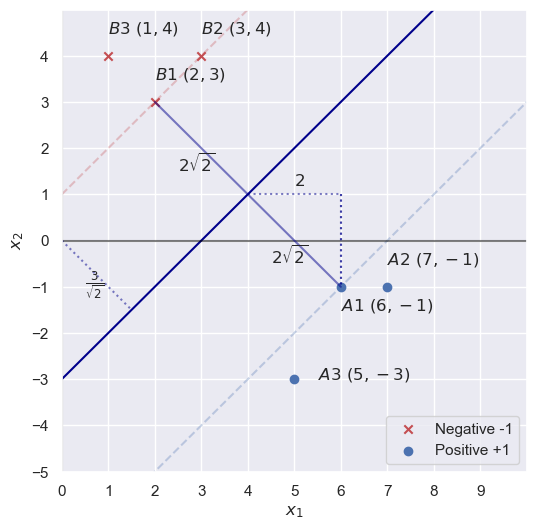

In [291]:
# Data set
x_neg = np.array([[3, 4], [1, 4], [2, 3]])
y_neg = np.array([-1, -1, -1])
x_pos = np.array([[6, -1], [7, -1], [5, -3]])
y_pos = np.array([1, 1, 1])
x1 = np.linspace(-10, 10, 100)  

# Parameters guessed by inspection
w = np.array([1, -1]).reshape(-1, 1)
b = -3

# Plot
fig = plt.figure(figsize=(6, 6)) 
plt.scatter(x_neg[:, 0], x_neg[:, 1], marker='x', color='r', label='Negative -1')
plt.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='b', label='Positive +1')

# Plot the decision boundary
plt.plot(x1, x1 - 3, color='darkblue')
plt.plot(x1, x1  - 7, linestyle = '--', alpha = .3, color = 'b')
plt.plot(x1, x1  + 1, linestyle = '--', alpha = .3, color = 'r')

# Set plot limits and ticks
plt.xlim(0, 10)
plt.ylim(-5, 5)
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(-5, 5, step=1))

# Plot lines
plt.axvline(0, color='black', alpha=.5)
plt.axhline(0, color='black', alpha=.5)
plt.plot([2,6],[3,-1], linestyle = '-', color = 'darkblue', alpha = .5 )
plt.plot([4,6],[1,1],[6,6],[1,-1], linestyle = ':', color = 'darkblue', alpha = .5 )
plt.plot([0,1.5],[0,-1.5],[6,6],[1,-1], linestyle = ':', color = 'darkblue', alpha = .5 )

# Annotations
plt.annotate('$2$', xy = (5,1.2), xytext = (5,1.2) )
plt.annotate('$A1 \ (6,-1)$', xy=(6, -1), xytext=(6, -1.5))
plt.annotate('$A2 \ (7,-1)$', xy=(7, -1), xytext=(7, -0.5))
plt.annotate('$A3 \ (5,-3)$', xy=(5.5, -3), xytext=(5.5, -3))
plt.annotate('$B1 \ (2,3)$', xy=(2, 3), xytext=(2, 3.5))
plt.annotate('$B2 \ (3,4)$', xy=(3, 4), xytext=(3, 4.5))
plt.annotate('$B3 \ (1,4)$', xy=(1, 4), xytext=(1, 4.5))
plt.annotate('$2\sqrt{2}$', xy = (4.5,-.5), xytext = (4.5,-.5))
plt.annotate('$2\sqrt{2}$', xy = (2.5,1.5), xytext = (2.5,1.5))
plt.annotate('$\\frac{3}{\sqrt{2}}$', xy = (.5,-1), xytext = (.5,-1))

# Labels and legend
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [292]:
# support vector 
B1 = np.array([2, 3])
B2 = np.array([3, 4])
A1 = np.array([6,-1])
classes = np.array([-1, -1, 1])

Constraint 1 →   ∑2_𝟏^𝒎▒𝜶_𝒊  𝒚^𝒊 = 0  

Constraint 2   ∑_𝒊^𝒎▒〖𝜶_𝒊 𝒚𝒊𝑲(𝒙𝒊,𝒙)+𝒃=+𝟏〗

Constraint 3 ∑_𝒊^𝒎▒〖𝜶_𝒊 𝒚𝒊𝑲(𝒙𝒊,𝒙)+𝒃=−𝟏〗

In [293]:
# Membuat kernel matrix
data_matrix = np.vstack([B1, B2, A1])
kernel_matrix = np.dot(data_matrix, data_matrix.T)

print("Kernel Matrix:")
print(kernel_matrix)

Kernel Matrix:
[[13 18  9]
 [18 25 14]
 [ 9 14 37]]


In [294]:
result_matrix = kernel_matrix * classes
print(result_matrix)

[[-13 -18   9]
 [-18 -25  14]
 [ -9 -14  37]]


In [295]:
# Matriks koefisien berdasarkan gaussion elemniation
A = np.array([[-1, -1, 1, 0],
              [-13, 18, 9, 1],
              [-18, -25, 14, 1],
              [-9, -14, 37, 1]])

b = np.array([0, 1, 1, -1])

# Menyelesaikan sistem persamaan linear
x = np.linalg.solve(A, b)
for i, value in enumerate(x):
    print(f"x{i+1} = {value:.4f}")

x1 = -0.0625
x2 = 0.0000
x3 = -0.0625
x4 = 0.7500


Constraint 1 →   ∑2_𝟏^𝒎▒𝜶_𝒊  𝒚^𝒊 = 0  

In [296]:
# Mencari weight 
b = 0.75
Aa = -0.0625
Ab = 0.0000
Ac = -0.0625

w = -Aa * B1 - Ab * B2 + Ac * A1
print(w) 

[-0.25  0.25]


Evaluate with sklearn support vector machine

In [298]:
from sklearn.svm import SVC

X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
y = np.array([-1,-1, -1, 1, 1 , 1 ])

clf = SVC(C = 1e5, kernel = 'linear')
clf.fit(X, y) 

print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ',  np.abs(clf.dual_coef_))

print('w = ',clf.coef_)
print('b = ',clf.intercept_)

Indices of support vectors =  [2 3]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.0625 0.0625]]
w =  [[ 0.25 -0.25]]
b =  [-0.75]
